In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)
df.head(30)

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11
769,Russia,RUS,1960,3
1028,United States,USA,1960,17
1029,United States,USA,1961,31
770,Russia,RUS,1961,7
1030,United States,USA,1962,55


In [54]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)

pivot_df_100 = pivot_df.divide(pivot_df.sum(axis=1), axis=0)

In [57]:
pivot_df.columns

Index(['RUS', 'USA'], dtype='object', name='Code')

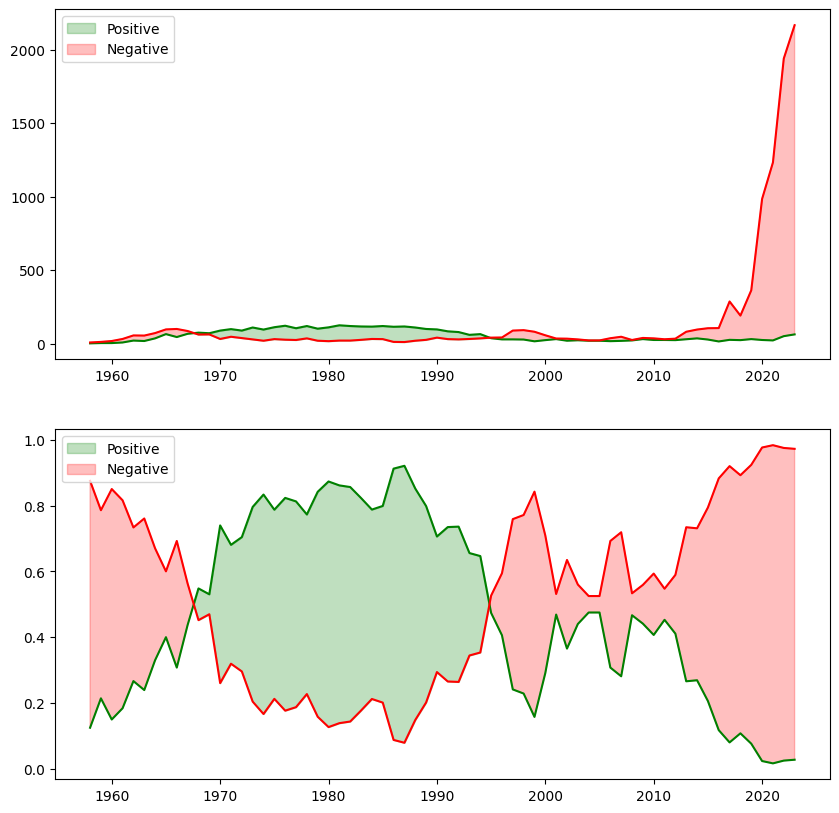

In [62]:
pivot_df

# Initialize figure and axis
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Plot lines
axs[0].plot(pivot_df.index, pivot_df['RUS'], color="green")
axs[0].plot(pivot_df.index, pivot_df['USA'], color="red")
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] > pivot_df['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] <= pivot_df['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[0].legend()

# Plot lines
axs[1].plot(pivot_df_100.index, pivot_df_100['RUS'], color="green")
axs[1].plot(pivot_df_100.index, pivot_df_100['USA'], color="red")
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] > pivot_df_100['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] <= pivot_df_100['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[1].legend(loc='upper left')

plt.show()

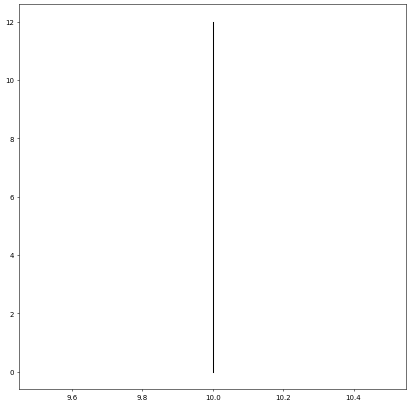

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot((10, 10), (0, 12), color='black')

plt.show()

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
from matplotlib.animation import FuncAnimation

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)

# pivot data
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)

# interpolate for more data points
new_index = np.linspace(pivot_df.index.min(), pivot_df.index.max(), len(pivot_df) * 3-2)
pivot_df = pivot_df.reindex(new_index).interpolate(method='polynomial', order=3)
pivot_df.reset_index(inplace=True)
pivot_df.rename(columns={'index': 'Year'}, inplace=True)
pivot_df['Year'] = pivot_df['Year'].astype(int)
pivot_df.index = pivot_df['Year']
pivot_df.drop(columns='Year', inplace=True)

pivot_df.index = new_index
pivot_df.head()

Code,RUS,USA
1958.000000,1.000000,7.000000
1958.333333,2.062947,8.276771
1958.666667,2.694802,9.576972
1959.000000,3.000000,11.000000
1959.333333,3.082976,12.645250


Original animation finished
Final animation finished!


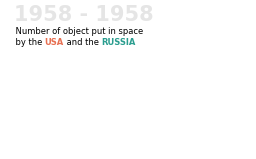

In [124]:
def annot_event(current_date, event_date, pos, text):
    if int(current_date) == event_date + delay_years:
        ax_text(
            pos[0], pos[1],
            text,
            fontsize=20,
            color='black',
            highlight_textprops=[
                {'fontweight':'bold'}
            ],
            ax=ax
        )
    if int(current_date) >= event_date + delay_years:
        sub_subset = pivot_df.loc[event_date]
        total_objects_thisyear = sub_subset['RUS'] + sub_subset['USA']
        ax.plot((event_date, event_date), (0, total_objects_thisyear), color='black')
        ax.scatter(event_date, total_objects_thisyear, color='black', s=100, zorder=10)

# increase resolution
plt.rcParams['figure.dpi'] = 30
plt.rcParams['savefig.dpi'] = 30

# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# parameters
delay_years = 1
initial_duration = 100
highlight_duration = 1500
colors = ['#2a9d8f', '#e76f51']
last_displayed_event_date = None

# dates to highlight
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
first_space_station = 1971
hubble_launch = 1990
internat_space_station = 1998
first_space_tourist = 2001
musk_rocket_returns = 2016
earth_size_found = 2017
photo_black_hole = 2019
james_webb_launch = 2021
commercial_spacecraft = 2022
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    first_space_station + delay_years,
    hubble_launch + delay_years,
    internat_space_station + delay_years,
    first_space_tourist + delay_years,
    musk_rocket_returns + delay_years,
    earth_size_found + delay_years,
    photo_black_hole + delay_years,
    james_webb_launch + delay_years,
    commercial_spacecraft + delay_years -1,
]

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index, subset_df.values.T,
        colors=colors
    )
    ax.set_axis_off()

    # year annotation in background
    year = pivot_df.index[frame]
    fig_text(
        0.1, 0.9,
        '1958 - ' + str(round(year)),
        ha='left', va='center',
        fontsize=50,
        fontweight='bold',
        alpha=0.1,
        fig=fig
    )

    # description of video
    text = """
    Number of object put in space
    by the <USA> and the <RUSSIA>
    """
    fig_text(
        0.07, 0.75,
        text,
        ha='left', va='center',
        fontsize=20,
        color='black',
        highlight_textprops=[
                {'color':colors[1],
                'fontweight':'bold'},
                {'color':colors[0],
                'fontweight':'bold'}
        ],
        fig=fig
    )


    annot_event(year, first_human_spaceflight, (1958, 30), f'First Human (Yuri Gagarin)\nSpaceflight in <{first_human_spaceflight}>')
    annot_event(year, us_moon_landing, (1960, 100), f'US Moon Landing in <{us_moon_landing}>')
    annot_event(year, first_space_station, (1960, 100), f'First Space\nStation in <{first_space_station}>')
    annot_event(year, hubble_launch, (1970, 150), f'Hubble Launch in <{hubble_launch}>')
    annot_event(year, internat_space_station, (1960, 100), f'International Space\nStation in <{internat_space_station}>')
    annot_event(year, first_space_tourist, (1960, 100), f'First Space Tourist in <{first_space_tourist}>')
    annot_event(year, musk_rocket_returns, (1960, 120), f'Musk Rocket Returns in <{musk_rocket_returns}>')
    annot_event(year, earth_size_found, (1960, 200), f'Earth Size Planets found in <{earth_size_found}>')
    annot_event(year, photo_black_hole, (1960, 300), f'First Image of a Black Hole in <{photo_black_hole}>')
    annot_event(year, james_webb_launch, (1960, 1000), f'James Webb Launch in <{james_webb_launch}>')
    annot_event(year, commercial_spacecraft, (1960, 1200), f'First Commercial Spacecraft Landing\non Moon in <{commercial_spacecraft+2}>')

    return ax

# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=5, # in ms
    cache_frame_data=False
)
ani.save('animation.gif', writer='imagemagick', fps=20)
print('Original animation finished')


# get initial frames
with Image.open('animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration

    # highlight dates
    if pivot_df.index[i] in dates_highlight:
        frame_duration = highlight_duration

    # stay for last date
    if i == len(frames) - 1:
        frame_duration = 10000
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save('modified_animation.gif', save_all=True, append_images=frames[1:], loop=0)
print('Final animation finished!')